In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

    

In [12]:
df = pd.read_csv('Social_Network_Ads.csv')

In [13]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [14]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [16]:
df.Gender = df.Gender.astype('category')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   User ID          400 non-null    int64   
 1   Gender           400 non-null    category
 2   Age              400 non-null    int64   
 3   EstimatedSalary  400 non-null    int64   
 4   Purchased        400 non-null    int64   
dtypes: category(1), int64(4)
memory usage: 13.1 KB


In [25]:
df = pd.get_dummies(df,columns=['Gender'], drop_first=True)

In [26]:
df

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1
...,...,...,...,...,...
395,15691863,46,41000,1,0
396,15706071,51,23000,1,1
397,15654296,50,20000,1,0
398,15755018,36,33000,0,1


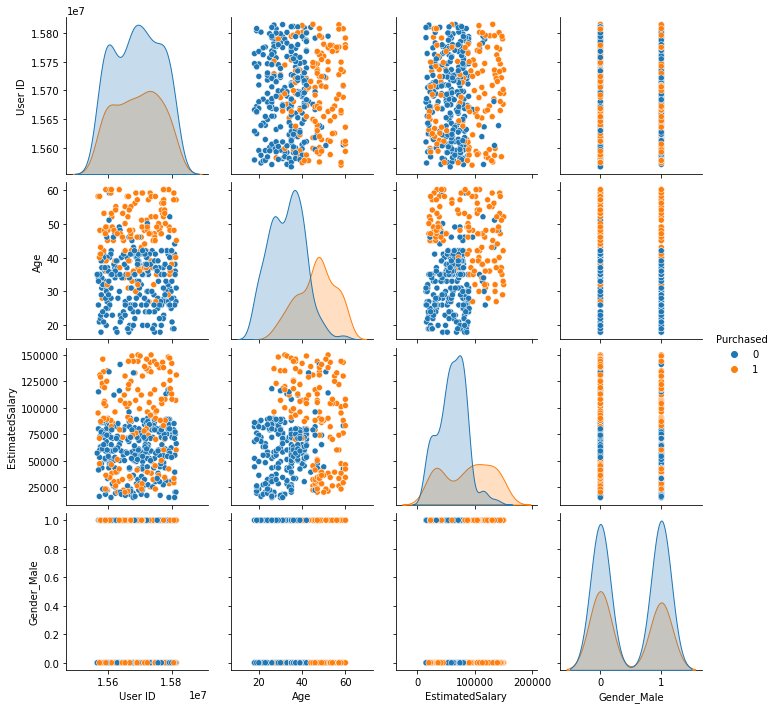

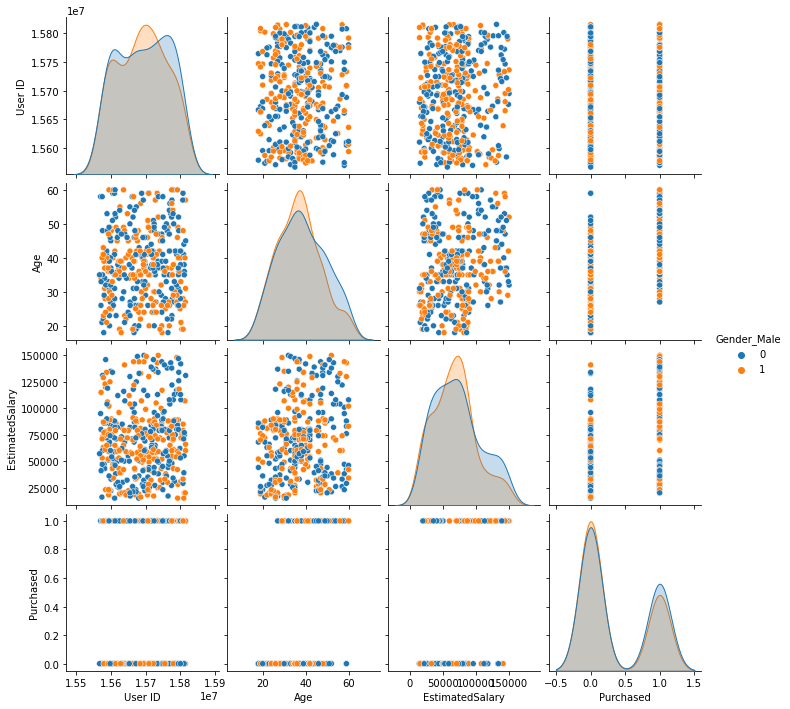

In [32]:
sns.pairplot(df,hue='Purchased')
sns.pairplot(df,hue='Gender_Male')

In [38]:
x = df.drop('Purchased', axis=1)
y = df['Purchased']

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.22,stratify=y)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn. neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, fbeta_score, precision_score, recall_score

In [43]:
models={
    'LR':LogisticRegression(),
    'KNN':KNeighborsClassifier(n_neighbors=7),
    'DT':DecisionTreeClassifier(),
    'SVC':SVC(),
    'RF':RandomForestClassifier(n_estimators=60),
    'XGBC':XGBClassifier(),
    'NB':GaussianNB()
}

In [48]:
for name,model in models.items():
    print(f'using: {name}')
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f'train accuarcy:{accuracy_score(y_train,model.predict(x_train))}')
    print(f'test accuarcy:{accuracy_score(y_test,y_pred)}')
    print(f'recall: {recall_score(y_test,y_pred)}')
    print(f'precision: {precision_score(y_test,y_pred)}')
    print(f'f1score: {f1_score(y_test,y_pred)}')
    print(f'fbeta: {fbeta_score(y_test,y_pred,beta=0.5)}')
    print(confusion_matrix(y_test,y_pred))
    print('_'*33)

using: LR
train accuarcy:0.7564102564102564
test accuarcy:0.8295454545454546
recall: 0.6129032258064516
precision: 0.8636363636363636
f1score: 0.7169811320754716
fbeta: 0.7983193277310925
[[54  3]
 [12 19]]
_________________________________
using: KNN
train accuarcy:0.7756410256410257
test accuarcy:0.7386363636363636
recall: 0.6129032258064516
precision: 0.6333333333333333
f1score: 0.6229508196721313
fbeta: 0.6291390728476821
[[46 11]
 [12 19]]
_________________________________
using: DT
train accuarcy:1.0
test accuarcy:0.8522727272727273
recall: 0.8387096774193549
precision: 0.7647058823529411
f1score: 0.7999999999999999
fbeta: 0.7784431137724551
[[49  8]
 [ 5 26]]
_________________________________
using: SVC
train accuarcy:0.6410256410256411
test accuarcy:0.6477272727272727
recall: 0.0
precision: 0.0
f1score: 0.0
fbeta: 0.0
[[57  0]
 [31  0]]
_________________________________
using: RF
train accuarcy:0.9935897435897436
test accuarcy:0.9204545454545454
recall: 0.967741935483871
precis

/home/mohazab/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mohazab/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:00:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train accuarcy:1.0
test accuarcy:0.8977272727272727
recall: 1.0
precision: 0.775
f1score: 0.8732394366197184
fbeta: 0.8115183246073298
[[48  9]
 [ 0 31]]
_________________________________
using: NB
train accuarcy:0.8942307692307693
test accuarcy:0.8977272727272727
recall: 0.9032258064516129
precision: 0.8235294117647058
f1score: 0.8615384615384616
fbeta: 0.8383233532934131
[[51  6]
 [ 3 28]]
_________________________________


In [52]:
# model with highest recall score as you are interested in predicting those who purchased than those who falsely predicted to purchase
model = GaussianNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [53]:
accuracy_score(y_test,y_pred)

0.8977272727272727

In [54]:
from sklearn.metrics import classification_report

classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.94      0.89      0.92        57\n           1       0.82      0.90      0.86        31\n\n    accuracy                           0.90        88\n   macro avg       0.88      0.90      0.89        88\nweighted avg       0.90      0.90      0.90        88\n'

In [55]:
df = pd.read_csv('Titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [57]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [64]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()
df['Age'] = imputer.fit_transform(df[['Age']])

In [65]:
df.Age.isnull().sum()


0

In [67]:
#  Dropped as moore than half records are missing
df.drop('Cabin', axis=1, inplace=True)

In [70]:
# Passenger id and ticket is irrelevannt to the Prediction right now
df.drop('PassengerId', axis=1, inplace=True)

In [90]:
df.drop('Ticket', axis=1, inplace=True)

In [78]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

df['Embarked']=imputer.fit_transform(df[['Embarked']])

In [91]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

<AxesSubplot:>

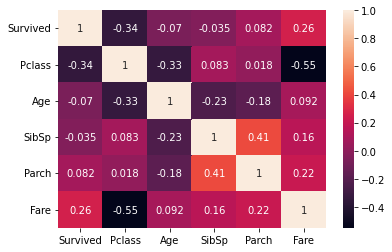

In [85]:
sns.heatmap(df.corr(), annot=True)

In [86]:
df.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [94]:
df = pd.get_dummies(df, columns=['Embarked'])

In [97]:
df = pd.get_dummies(df, columns=['Sex'])

In [102]:
df.drop('Sex_female',axis=1, inplace=True)

In [103]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_male
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.188552,0.086420,0.725028,0.647587
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.391372,0.281141,0.446751,0.477990
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000


In [112]:
# drop name as it is  string and same vakue as  being index

df.drop('Name', axis=1, inplace=True)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Embarked_C  891 non-null    uint8  
 7   Embarked_Q  891 non-null    uint8  
 8   Embarked_S  891 non-null    uint8  
 9   Sex_male    891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 45.4 KB


In [115]:
x = df.drop('Survived', axis=1)
y =df['Survived']

In [116]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.22, stratify=y)

In [117]:
models={
    'LR':LogisticRegression(),
    'KNN':KNeighborsClassifier(n_neighbors=7),
    'DT':DecisionTreeClassifier(),
    'SVC':SVC(),
    'RF':RandomForestClassifier(n_estimators=60),
    'XGBC':XGBClassifier(),
    'NB':GaussianNB()
}

In [118]:
for name,model in models.items():
    print(f'using: {name}')
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f'train accuarcy:{accuracy_score(y_train,model.predict(x_train))}')
    print(f'test accuarcy:{accuracy_score(y_test,y_pred)}')
    print(f'recall: {recall_score(y_test,y_pred)}')
    print(f'precision: {precision_score(y_test,y_pred)}')
    print(f'f1score: {f1_score(y_test,y_pred)}')
    print(f'fbeta: {fbeta_score(y_test,y_pred,beta=0.5)}')
    print(confusion_matrix(y_test,y_pred))
    print('_'*33)

using: LR
train accuarcy:0.8054755043227666
test accuarcy:0.7868020304568528
recall: 0.6710526315789473
precision: 0.75
f1score: 0.7083333333333334
fbeta: 0.7327586206896552
[[104  17]
 [ 25  51]]
_________________________________
using: KNN
train accuarcy:0.7780979827089337
test accuarcy:0.6903553299492385
recall: 0.5394736842105263
precision: 0.6119402985074627
f1score: 0.5734265734265734
fbeta: 0.5959302325581396
[[95 26]
 [35 41]]
_________________________________
using: DT
train accuarcy:0.9855907780979827
test accuarcy:0.7360406091370558
recall: 0.6842105263157895
precision: 0.65
f1score: 0.6666666666666667
fbeta: 0.6565656565656566
[[93 28]
 [24 52]]
_________________________________
using: SVC
train accuarcy:0.6757925072046109
test accuarcy:0.6954314720812182
recall: 0.3157894736842105
precision: 0.75
f1score: 0.44444444444444436
fbeta: 0.5882352941176471
[[113   8]
 [ 52  24]]
_________________________________
using: RF


/home/mohazab/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train accuarcy:0.9855907780979827
test accuarcy:0.7918781725888325
recall: 0.6973684210526315
precision: 0.7464788732394366
f1score: 0.7210884353741497
fbeta: 0.7361111111111112
[[103  18]
 [ 23  53]]
_________________________________
using: XGBC
[19:58:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mohazab/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


train accuarcy:0.9711815561959655
test accuarcy:0.7817258883248731
recall: 0.6842105263157895
precision: 0.7323943661971831
f1score: 0.7074829931972789
fbeta: 0.7222222222222222
[[102  19]
 [ 24  52]]
_________________________________
using: NB
train accuarcy:0.8011527377521613
test accuarcy:0.7817258883248731
recall: 0.7105263157894737
precision: 0.72
f1score: 0.7152317880794702
fbeta: 0.7180851063829786
[[100  21]
 [ 22  54]]
_________________________________


In [ ]:
# naive bayes is  probably the best estimate as its recall score is the highest,
# whcih means that model predicted the least deaths.